In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# carrega o dataset
dataset = pd.read_csv('01.1-clusterizacao-kmeans.csv', delimiter=';', decimal=',')

faturamentoBruto = dataset['faturamentoBruto']
margemBruta = dataset['margemBruta']
restricoes = dataset['restricoes']
cluster = dataset["cluster"]

dataset_norm = pd.concat([faturamentoBruto, margemBruta, restricoes], axis=1)

scaler = MinMaxScaler()
dataset_norm = scaler.fit_transform(dataset_norm)
dataset_norm = pd.DataFrame(dataset_norm, columns = ['faturamentoBruto','margemBruta','restricoes'])
dataset_norm = pd.concat([dataset_norm, cluster], axis=1)

# print(dataset.head())

<AxesSubplot:xlabel='cluster', ylabel='count'>

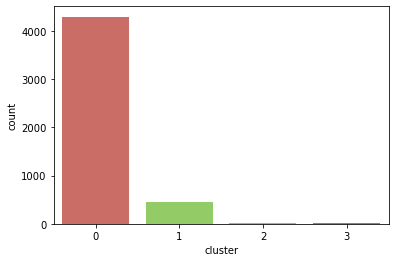

In [49]:
sb.countplot(x='cluster', data=dataset, palette='hls')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1289
           1       0.99      1.00      1.00       133
           2       1.00      0.80      0.89         5
           3       1.00      0.50      0.67         6

    accuracy                           1.00      1433
   macro avg       1.00      0.82      0.89      1433
weighted avg       1.00      1.00      1.00      1433

0.9972086531751571


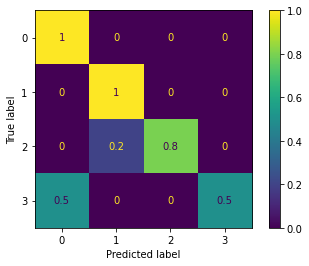

In [4]:
dataset0 = dataset_norm[(dataset_norm['cluster'] == 0)]
dataset1 = dataset_norm[(dataset_norm['cluster'] == 1)]
dataset2 = dataset_norm[(dataset_norm['cluster'] == 2)]
dataset3 = dataset_norm[(dataset_norm['cluster'] == 3)]

X0 = dataset0.iloc[:,[0,1,2]].values
y0 = dataset0.iloc[:,3].values
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size=.3, random_state=25)

X1 = dataset1.iloc[:,[0,1,2]].values
y1 = dataset1.iloc[:,3].values
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.3, random_state=25)

X2 = dataset2.iloc[:,[0,1,2]].values
y2 = dataset2.iloc[:,3].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=.3, random_state=25)

X3 = dataset3.iloc[:,[0,1,2]].values
y3 = dataset3.iloc[:,3].values
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=.3, random_state=25)

X_train = np.concatenate([X0_train, X1_train, X2_train, X3_train], axis=0)
X_test = np.concatenate([X0_test, X1_test, X2_test, X3_test], axis=0)
y_train = np.concatenate([y0_train, y1_train, y2_train, y3_train], axis=0)
y_test = np.concatenate([y0_test, y1_test, y2_test, y3_test], axis=0)

Classif_KNN = KNeighborsClassifier(n_neighbors=4)
Classif_KNN.fit(X_train, y_train)
y_pred = Classif_KNN.predict(X_test)

from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

# plot_confusion_matrix(Classif_KNN, X_test, y_test, normalize = 'true')

# print(classification_report(y_test, y_pred))
# print(accuracy_score(y_test, y_pred))
#0.7790262172284644


# testa do K=1 até K=26
# k_range = range(1, 26)

# Lista todas as acurácias
# scores = []

# Faz um loop de 1 a 26 armazena no dicionário scores
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train)
#     y_pred = knn.predict(X_test)
#     scores.append(accuracy_score(y_test, y_pred))

# print(scores)
#Plota os valores de acc. em função do valor escolhido de K
# plt.plot(k_range, scores)
# plt.xlabel('Value of K for KNN')
# plt.ylabel('Testing Accuracy')

#Avaliando a melhor configuração de KNN
best_KNN = KNeighborsClassifier(n_neighbors=3) # 3
best_KNN.fit(X_train, y_train)
y_pred = best_KNN.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(best_KNN, X_test, y_test, normalize = 'true')

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

In [10]:
# carrega o dataset
novosclientes = pd.read_csv('https://raw.githubusercontent.com/aasartorelli/fiap-desafio/main/novos-clientes.csv', encoding = "ISO-8859-1")

novosclientes.head()



,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,faturamentoBruto,ST_CONTA_FIXA,periodoDemonstrativoEmMeses,RESULTADO_BRUTO,margemBruta,restricoes
0,00.000.000/0001-91,12/31/2016,3,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,1/1/2016,12/31/2016,3.01,Receitas da Intermediação Financeira,"$168,039,236.00","$168,039,236,000.00",S,12,134531183.0,"$134,531,183,000.00",NaN
1,00.000.208/0001-00,12/31/2016,2,BRB BCO DE BRASILIA S.A.,14206,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,1/1/2016,12/31/2016,3.01,Receitas da Intermediação Financeira,"$2,929,559.00","$2,929,559,000.00",S,12,1596364.0,"$1,596,364,000.00",NaN
2,00.001.180/0001-26,12/31/2016,1,CENTRAIS ELET BRAS S.A. - ELETROBRAS,2437,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,1/1/2016,12/31/2016,3.01,Receita de Venda de Bens e/ou Serviços,"$60,748,853.00","$60,748,853,000.00",S,12,16210934.0,"$16,210,934,000.00",NaN
3,00.070.698/0001-11,12/31/2016,1,CIA ENERGETICA DE BRASILIA,14451,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,1/1/2016,12/31/2016,3.01,Receita de Venda de Bens e/ou Serviços,"$2,114,554.00","$2,114,554,000.00",S,12,1836430.0,"$1,836,430,000.00",NaN
4,00.336.701/0001-04,12/31/2016,1,TELEC BRASILEIRAS S.A. TELEBRAS,11258,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,1/1/2016,12/31/2016,3.01,Receita de Venda de Bens e/ou Serviços,"$56,054.00","$56,054,000.00",S,12,159676.0,"$159,676,000.00",NaN


In [9]:
def ajustaDataset(dataset):
# periodoDemonstrativoEmMeses -> converte valores nulos ou 0 em 1
    dataset['periodoDemonstrativoEmMeses'] = dataset['periodoDemonstrativoEmMeses'].replace(np.nan, 1)
    dataset['periodoDemonstrativoEmMeses'] = dataset['periodoDemonstrativoEmMeses'].replace(0, 1)

    # faturamentoBruto -> converte valores nulos em 0 e divide pelo periodoDemonstrativoEmMeses
    dataset['faturamentoBruto'] = dataset['faturamentoBruto'].replace(np.nan, 0)
    dataset['faturamentoBruto'] = dataset['faturamentoBruto'] / dataset['periodoDemonstrativoEmMeses']

# margemBruta -> converte valores nulos em 0 e divide pelo periodoDemonstrativoEmMeses
    dataset['margemBruta'] = dataset['margemBruta'].replace(np.nan, 0)
    dataset['margemBruta'] = dataset['margemBruta'] / dataset['periodoDemonstrativoEmMeses']

# monta o dataset que será trabalhado
    dataset = pd.concat([
        faturamentoBruto,
        margemBruta,
        restricoes
    ], axis=1)

# faturamentoBruto -> remove valores nulos ou inferiores a 1.000,00 (outliers?)
    dataset.dropna(subset=['faturamentoBruto'], inplace=True)
    faturamentoBrutoIdx = dataset[(dataset['faturamentoBruto'] < 1000.0)].index
    dataset.drop(faturamentoBrutoIdx, inplace=True)

# margemBruta -> remove valores nulos
    dataset.dropna(subset=['margemBruta'], inplace=True)

# restricoes -> converte valores nulos em falso e transforma bool em int
    dataset['restricoes'] = dataset['restricoes'].replace(np.nan, False)
    dataset['restricoes'] = dataset['restricoes'].astype(int)

# remove valores duplicados (cada compra de uma empresa é uma foto)
    dataset.drop_duplicates(inplace=True)

# indexa novamente o dataset para remover índices ainda em memória
    dataset.reset_index(drop=True, inplace=True)
    
    return(dataset)
